In [8]:
target_rd=3000

import pandas as pd 
df= pd.read_csv('output_CD8.csv', index_col=0)
df

,CD8_Lowery_pos_243g,CD8_Oliveira_TTE_100g,CD8_Oliveira_pos_74g,CD8_Yost_CD8_Exh_100g,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g
AAACCTGAGAAACGAG-1_13_1,0.180882,-0.091274,-0.376032,0.180017,0.160737,2.083105,0.190877
AAACCTGAGAAACGCC-1_16_1,0.195508,-0.124232,-0.339500,-0.045054,0.074777,2.600529,0.336704
AAACCTGAGAAGATTC-1_13_1,0.068809,-0.020631,-0.322782,0.018039,0.224473,2.534210,0.233107
AAACCTGAGAAGGGTA-1_8_2,0.373746,0.058472,-0.095487,0.064011,0.340488,1.766322,0.234062
AAACCTGAGAATTGTG-1_7_2,0.282852,-0.081422,-0.144416,0.114490,0.329768,2.123718,0.191366
...,...,...,...,...,...,...,...
restaging-30-518937639_fastq_v1_2021-04-27-1-8_hash9_TTGGAACTCAATAAGG-1,0.359640,0.024330,-0.136813,0.117328,0.622550,2.086396,0.173462
restaging-30-518937639_fastq_v1_2021-04-27-1-8_hash9_TTGGCAAGTCTTCAAG-1,0.109903,-0.086268,-0.297862,-0.024466,0.136610,1.991756,0.073166
restaging-30-518937639_fastq_v1_2021-04-27-1-8_hash9_TTTATGCAGCGTTGCC-1,0.173206,-0.012259,-0.140535,-0.068988,0.356752,2.404641,0.135493
restaging-30-518937639_fastq_v1_2021-04-27-1-8_hash9_TTTCCTCTCTGCTGCT-1,0.265929,0.022207,-0.123161,0.132923,0.381669,2.218905,0.211164


In [9]:
scale_CD8 = pd.read_csv('../data/scale_CD8.tsv', sep = "\t", index_col=0)
scale_CD8

,mean,sd
signature,,
CD8_Lowery_pos_243g,0.362506,0.095228
CD8_Oliveira_TTE_100g,0.161207,0.105119
CD8_Oliveira_pos_74g,0.006769,0.143675
CD8_Yost_CD8_Exh_100g,0.250270,0.134015
CD8_ave_Hanada_pos_27g,0.500332,0.206234
CD8_ave_Hanada_neg_5g,1.820868,0.400367
CD8_ave_Oliveira_virus_26g,0.203399,0.103565


In [10]:
df

,CD8_Lowery_pos_243g,CD8_Oliveira_TTE_100g,CD8_Oliveira_pos_74g,CD8_Yost_CD8_Exh_100g,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g
AAACCTGAGAAACGAG-1_13_1,0.180882,-0.091274,-0.376032,0.180017,0.160737,2.083105,0.190877
AAACCTGAGAAACGCC-1_16_1,0.195508,-0.124232,-0.339500,-0.045054,0.074777,2.600529,0.336704
AAACCTGAGAAGATTC-1_13_1,0.068809,-0.020631,-0.322782,0.018039,0.224473,2.534210,0.233107
AAACCTGAGAAGGGTA-1_8_2,0.373746,0.058472,-0.095487,0.064011,0.340488,1.766322,0.234062
AAACCTGAGAATTGTG-1_7_2,0.282852,-0.081422,-0.144416,0.114490,0.329768,2.123718,0.191366
...,...,...,...,...,...,...,...
restaging-30-518937639_fastq_v1_2021-04-27-1-8_hash9_TTGGAACTCAATAAGG-1,0.359640,0.024330,-0.136813,0.117328,0.622550,2.086396,0.173462
restaging-30-518937639_fastq_v1_2021-04-27-1-8_hash9_TTGGCAAGTCTTCAAG-1,0.109903,-0.086268,-0.297862,-0.024466,0.136610,1.991756,0.073166
restaging-30-518937639_fastq_v1_2021-04-27-1-8_hash9_TTTATGCAGCGTTGCC-1,0.173206,-0.012259,-0.140535,-0.068988,0.356752,2.404641,0.135493
restaging-30-518937639_fastq_v1_2021-04-27-1-8_hash9_TTTCCTCTCTGCTGCT-1,0.265929,0.022207,-0.123161,0.132923,0.381669,2.218905,0.211164


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

pos_sigs_CD8 = [
    "CD8_Lowery_pos_243g", 
    "CD8_Oliveira_TTE_100g", 
    "CD8_Oliveira_pos_74g", 
    "CD8_Yost_CD8_Exh_100g", 
    "CD8_ave_Hanada_pos_27g"
]
neg_sigs_CD8 = [
    "CD8_ave_Hanada_neg_5g", 
    "CD8_ave_Oliveira_virus_26g"
]

# Standardize the specified columns
df_std = df.copy()
# Ensure all columns of df_std are in scale_CD8.index
missing_cols = [col for col in df_std.columns if col not in scale_CD8.index]
if missing_cols:
    raise ValueError(f"The following columns are missing in scale_CD8.index: {missing_cols}")

for col in df_std.columns:
    df_std[col] = (df_std[col] - scale_CD8.loc[col, "mean"]) / scale_CD8.loc[col, "sd"]
df_std



,CD8_Lowery_pos_243g,CD8_Oliveira_TTE_100g,CD8_Oliveira_pos_74g,CD8_Yost_CD8_Exh_100g,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g
AAACCTGAGAAACGAG-1_13_1,-1.907244,-2.401854,-2.664355,-0.524221,-1.646649,0.654991,-0.120911
AAACCTGAGAAACGCC-1_16_1,-1.753662,-2.715389,-2.410087,-2.203672,-2.063456,1.947366,1.287157
AAACCTGAGAAGATTC-1_13_1,-3.084129,-1.729824,-2.293725,-1.732883,-1.337601,1.781720,0.286847
AAACCTGAGAAGGGTA-1_8_2,0.118029,-0.977321,-0.711720,-1.389841,-0.775063,-0.136240,0.296071
AAACCTGAGAATTGTG-1_7_2,-0.836454,-2.308131,-1.052271,-1.013179,-0.827042,0.756432,-0.116189
...,...,...,...,...,...,...,...
restaging-30-518937639_fastq_v1_2021-04-27-1-8_hash9_TTGGAACTCAATAAGG-1,-0.030095,-1.302110,-0.999357,-0.991997,0.592622,0.663212,-0.289066
restaging-30-518937639_fastq_v1_2021-04-27-1-8_hash9_TTGGCAAGTCTTCAAG-1,-2.652597,-2.354229,-2.120280,-2.050050,-1.763638,0.426829,-1.257497
restaging-30-518937639_fastq_v1_2021-04-27-1-8_hash9_TTTATGCAGCGTTGCC-1,-1.987854,-1.650185,-1.025262,-2.382266,-0.696200,1.458096,-0.655689
restaging-30-518937639_fastq_v1_2021-04-27-1-8_hash9_TTTCCTCTCTGCTGCT-1,-1.014159,-1.322305,-0.904333,-0.875629,-0.575378,0.994180,0.074979


In [12]:
pos_cut = -0.1454463
neg_cut = -0.06552305

df["pos_score_CD8"] = df_std[pos_sigs_CD8].mean(axis=1)
df["neg_score_CD8"] = df_std[neg_sigs_CD8].mean(axis=1)
df["cancer_reactive_per_cell_CD8"] = (
        (df["pos_score_CD8"] >  pos_cut) &
        (df["neg_score_CD8"] <  neg_cut)
    )
df["cancer_reactive_per_cell_CD8"] = df["cancer_reactive_per_cell_CD8"].astype(int)
df["cancer_reactive_per_cell_CD8"].value_counts().sort_index()

cancer_reactive_per_cell_CD8
0    265011
1      8386
Name: count, dtype: int64

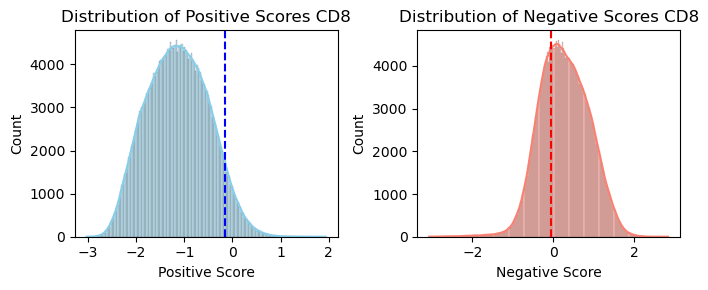

In [13]:
plt.figure(figsize=(7,3))

plt.subplot(1,2,1)
sns.histplot(df['pos_score_CD8'], kde=True, color='skyblue')
plt.axvline(pos_cut, color='blue', linestyle='--', linewidth=1.5, label=f'cut={pos_cut:.2f}')
plt.title('Distribution of Positive Scores CD8')
plt.xlabel('Positive Score')

plt.subplot(1, 2, 2)
sns.histplot(df['neg_score_CD8'], kde=True, color='salmon')
plt.axvline(neg_cut, color='red', linestyle='--', linewidth=1.5, label=f'cut={neg_cut:.2f}')
plt.title('Distribution of Negative Scores CD8')
plt.xlabel('Negative Score')

plt.tight_layout()
plt.show()

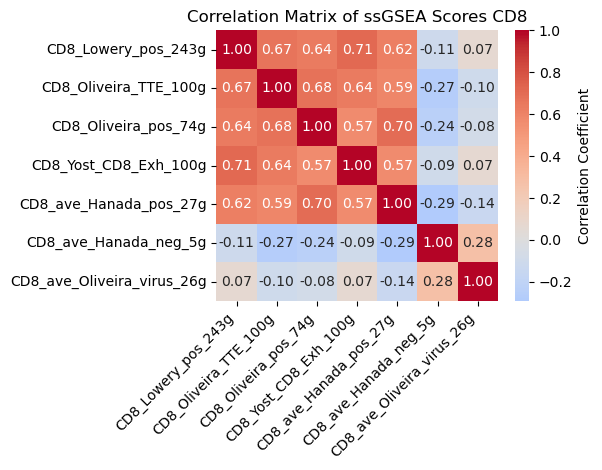

In [14]:
all_sigs_CD8 = pos_sigs_CD8+neg_sigs_CD8

corr_matrix = df[all_sigs_CD8].corr()

plt.figure(figsize=(6,4.8))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f", 
                      cbar_kws={"label": "Correlation Coefficient"})


plt.title("Correlation Matrix of ssGSEA Scores CD8")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()